### Cálculo da Hidrograma Unitário - notação matricial

Os dados são mostrados baixo:

| Tempo $(\mathrm{h})$ | Precipitação Efetiva $(\mathrm{cm})$ | Escoamento direto $\left(\mathrm{m}^3 / \mathrm{s}\right)$ |
| :---: | :---: | :---: |
| 1 | 1 | 1 |
| 2 | 2 | 2 |
| 3 | - | 10 |
| 4 | - | 2 |

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
#np.linalg.solve?

In [ ]:
# Dados:
precipitation = np.array([1,2])
index_prec = np.arange(1,len(precipitation)+1)
Q = [1,2,10,2]
index_vazao = np.arange(1,len(Q)+1)
index_vazao

array([1, 2, 3, 4])

<Figure size 1000x400 with 0 Axes>

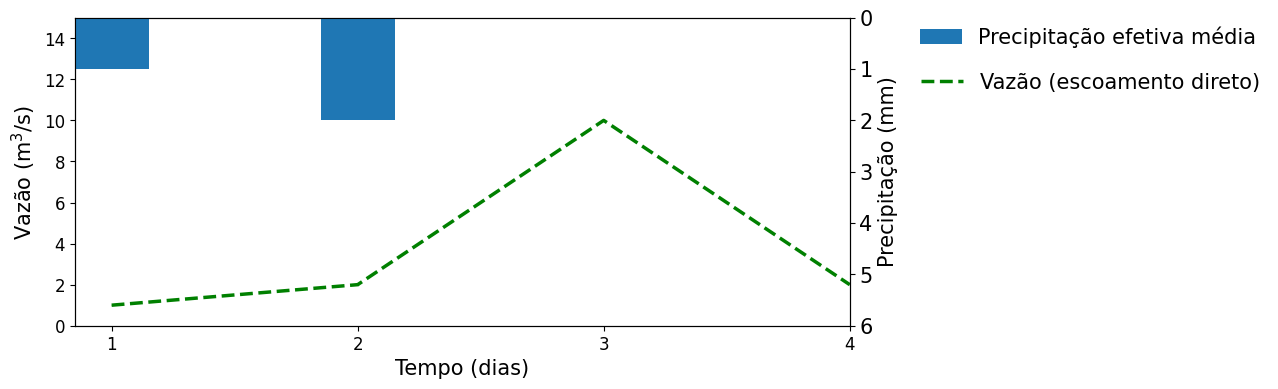

In [ ]:
plt.figure(figsize=(10,4))
#plt.gcf().autofmt_xdate()

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(index_vazao,Q,color='green', marker='o', linestyle='dashed',linewidth=2.5, markersize=0.1, label = 'Vazão (escoamento direto)')
ax1.set_ylim(0,15)
ax1.margins(0.0)
ax1.tick_params(axis='both', labelsize=12,rotation=0) #increase font size for ticks
ax1.set_xlabel(r'Tempo (dias)', fontsize=15) #y label
ax1.set_ylabel(r'Vazão (m$^3$/s)', fontsize=15) #y label

ax1.legend(bbox_to_anchor=(1.54, 0.85), borderaxespad=0.,frameon=False, fontsize=15)

ax2 = ax1.twinx()
ax2.margins(0.0)
ax2.bar(index_prec,precipitation, width=0.3, label = 'Precipitação efetiva média')

ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel('Precipitação (mm)', fontsize=15) #y label
ax2.set_ylim(6,0)
ax2.legend(loc=0)

leg = plt.legend();

x = index_vazao
# Definindo os valores inteiros no eixo x
plt.xticks(np.arange(min(x), max(x)+1, 1))

plt.tick_params(axis='both', labelsize=15, labelrotation=0) #increase font size for ticks
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left', borderaxespad=0.,frameon=False, fontsize=15)
plt.savefig('vazao_versus_prec_selecao.png', dpi = 300, bbox_inches='tight')
plt.show();



### Solução da Hidrógrafa Unitária

In [ ]:
M = len(precipitation)
N = len(Q)
K = N-M+1

P = np.zeros((N,K))

In [ ]:
for j in range(0,K):
  for i in range(0,K):
    for l in range(0,M):
      row = j+l
      P[row,j] = precipitation[l]

In [ ]:
Ptransposta = np.zeros((K,N))
for i in range(0,N):
  for j in range(0,K):
    Ptransposta[j,i]=P[i,j]

In [ ]:
Ptransposta

array([[1., 2., 0., 0.],
       [0., 1., 2., 0.],
       [0., 0., 1., 2.]])

In [ ]:
Z = np.matmul(Ptransposta,P)
rhs = np.matmul(Ptransposta,Q)
UH = np.linalg.solve(Z,rhs)
UH

array([-0.69411765,  4.23529412,  1.10588235])

In [ ]:
print("Ordenadas da Hidrógrafa Unitária:",UH)

Ordenadas da Hidrógrafa Unitária: [-0.69411765  4.23529412  1.10588235]


In [ ]:
# inverse of Z
Z_inv = np.linalg.inv(Z)
print("Inverse of Z:")
print(Z_inv)


Inverse of Z:
[[ 0.24705882 -0.11764706  0.04705882]
 [-0.11764706  0.29411765 -0.11764706]
 [ 0.04705882 -0.11764706  0.24705882]]


In [ ]:
# Z_inv*Ptransposta
Zinv_Ptransposta = np.matmul(Z_inv, Ptransposta)
print("Zinv*Ptransposta:")
print(Zinv_Ptransposta)


Zinv*Ptransposta:
[[ 0.24705882  0.37647059 -0.18823529  0.09411765]
 [-0.11764706  0.05882353  0.47058824 -0.23529412]
 [ 0.04705882 -0.02352941  0.01176471  0.49411765]]


In [ ]:
np.matmul(Zinv_Ptransposta, Q)


array([-0.69411765,  4.23529412,  1.10588235])

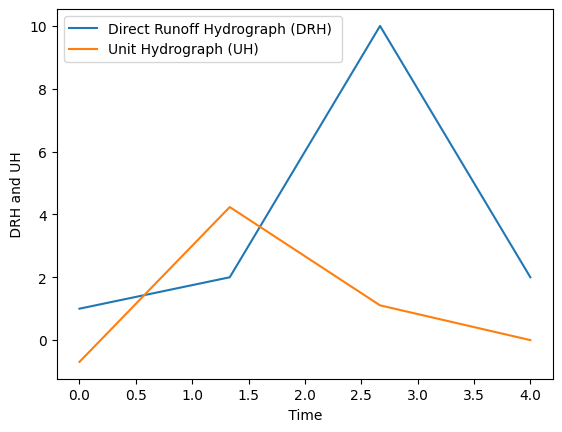

In [ ]:
UH1=np.zeros(N)
for i in range(0,K):
  UH1[i] = UH[i]

time = np.linspace (0,N,N)
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
plt.plot(time, Q, label='Direct Runoff Hydrograph (DRH) ')
plt.plot(time, UH1, label='Unit Hydrograph (UH)')
leg = ax.legend()
ax.set_xlabel(' Time ')
ax.set_ylabel (' DRH and UH ')
plt.show()